In [1]:
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt; plt.rcdefaults()
import sys
from sklearn.metrics import f1_score

In [2]:
# @param individual data point, number of categories @return label in binary 
def oneHotEncode(datum, num_cats): 
    result = [0 for i in range(num_cats)] 
    result[datum] = 1 
    return np.asarray(result)

In [3]:
%run utilities.py
#file names of things we are going to keep
file_names = generate_file_names("data.csv")

In [4]:
"""read in file from csv"""
data = pd.read_csv('data.csv') 

In [6]:
data = data.loc[data["Unnamed: 0.1"].isin(file_names)]
# Normalize pitch 
data['pitch'] = data['pitch'].apply(lambda x: x/(data['pitch'].max())) 
# Normalize velocity
data['velocity'] = data['velocity'].apply(lambda x: x/(data['velocity'].max())) 
# Only use acoustic data
acoustic_data = data[(data["instrument_source_str"] == "acoustic")]  
# Drop labels from x data
acoustic_data = acoustic_data.drop(['instrument_family_str', 'instrument_source_str'], axis=1) 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(data.instrument_family)) 

In [8]:
acoustic_data_1 = acoustic_data[list(acoustic_data.columns[-10:]) + ["pitch", "velocity", "instrument_family"]]

In [9]:
# @param data to train model with @return accuracy as decimal 
def multi_class_model(acoustic_data, y): 
    x = (acoustic_data.drop(['instrument_family'], axis=1)).to_numpy() 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    print(x_train.shape)
    model = models.Sequential()
    model.add(layers.Dense(12, activation='relu', input_dim=12)) 
    model.add(layers.Dense(12, activation='relu')) 
    model.add(layers.Dense(8, activation='softmax')) 
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) 
    history = model.fit(x_train, y_train,batch_size=12, epochs=30, verbose=0) 
    results = model.evaluate(x_test, y_test, batch_size=512, verbose=0)  
    print("Accuracy: ", results[1]) 
    return results[1], model, x_test, y_test

In [20]:
result, model, x_test, y_test = multi_class_model(acoustic_data_1, yy)

(16080, 12)
Accuracy:  0.4169192


In [11]:
classes = np.array(list(["brass","flute","guitar","keyboard","mallet","reed","string","vocal"]))

Normalized confusion matrix


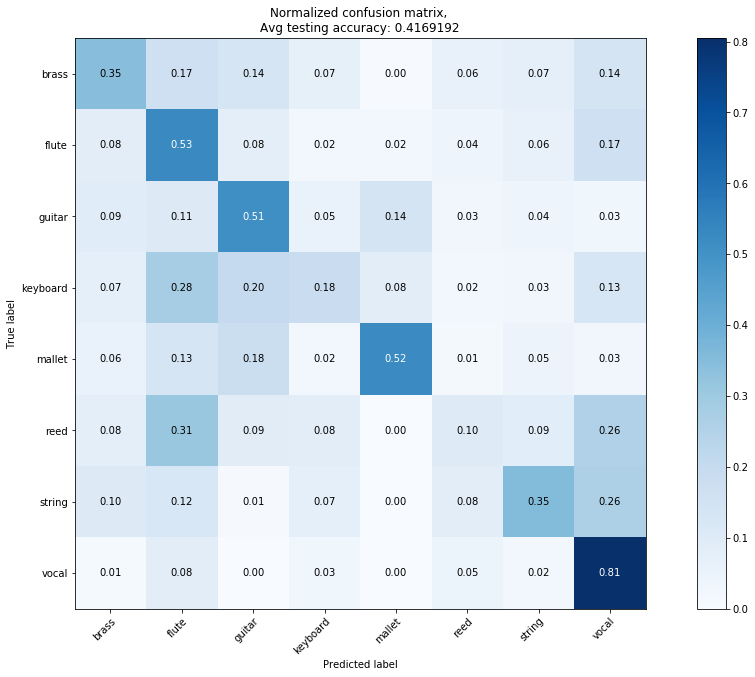

In [23]:
predictions = model.predict_classes(x_test)
actuals = list(np.argmax(x) for x in y_test)
ax = plot_confusion_matrix(actuals, predictions, result, classes, normalize =True)
plt.savefig("reversed.png", bbox_layout = "tight")
plt.savefig("Confusion_temporal.png")
plt.show()

# Without percussive

In [13]:
# @param data to train model with @return accuracy as decimal 
def multi_class_model_wopercussive(acoustic_data, y): 
    x = (acoustic_data.drop(['instrument_family', 'percussive'], axis=1)).to_numpy() 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    print(x_train.shape)
    model = models.Sequential()
    model.add(layers.Dense(11, activation='relu', input_dim=11)) 
    model.add(layers.Dense(12, activation='relu')) 
    model.add(layers.Dense(8, activation='softmax')) 
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) 
    history = model.fit(x_train, y_train,batch_size=12, epochs=30, verbose=0) 
    results = model.evaluate(x_test, y_test, batch_size=512, verbose=0)  
    print("Accuracy: ", results[1]) 
    return results[1], model, x_test, y_test

(16080, 11)
Accuracy:  0.3959596
Normalized confusion matrix


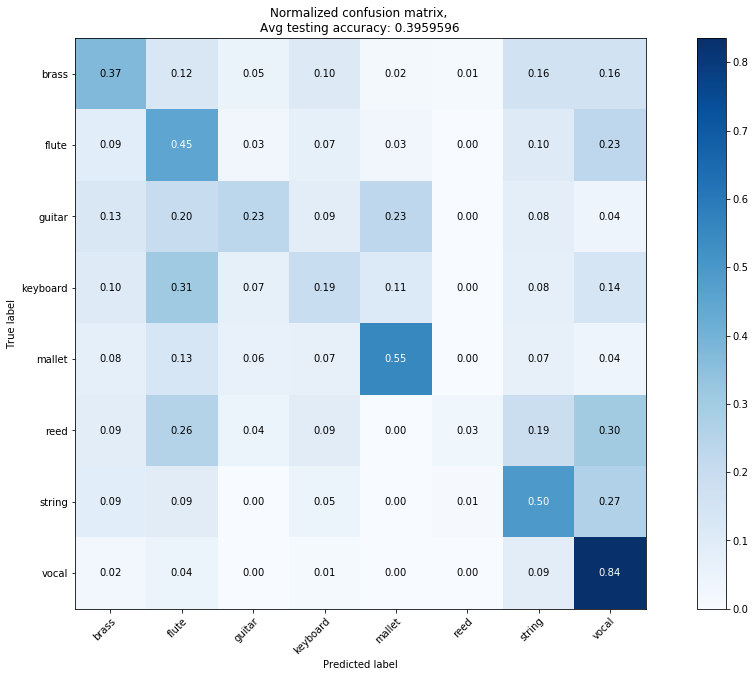

In [14]:
result, model, x_test, y_test = multi_class_model_wopercussive(acoustic_data_1, yy)
predictions = model.predict_classes(x_test)
actuals = list(np.argmax(x) for x in y_test)
ax = plot_confusion_matrix(actuals, predictions, result, classes, normalize =True)
plt.savefig("reversed.png", bbox_layout = "tight")
plt.savefig("Confusion_temporal_wopercussive.png")
plt.show()

# Without percussive and fast_decay

In [15]:
# @param data to train model with @return accuracy as decimal 
def multi_class_model_wopercussiveanddecay(acoustic_data, y): 
    x = (acoustic_data.drop(['instrument_family', 'percussive', 'fast_decay'], axis=1)).to_numpy() 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    print(x_train.shape)
    model = models.Sequential()
    model.add(layers.Dense(11, activation='relu', input_dim=10)) 
    model.add(layers.Dense(12, activation='relu')) 
    model.add(layers.Dense(8, activation='softmax')) 
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) 
    history = model.fit(x_train, y_train,batch_size=12, epochs=30, verbose=0) 
    results = model.evaluate(x_test, y_test, batch_size=512, verbose=0)  
    print("Accuracy: ", results[1]) 
    return results[1], model, x_test, y_test

(16080, 10)
Accuracy:  0.36199495
Normalized confusion matrix


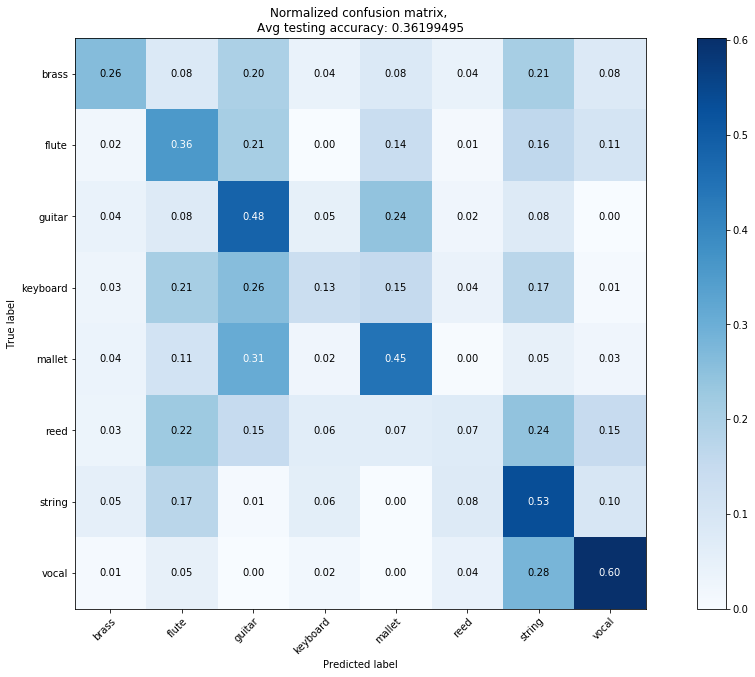

In [16]:
result, model, x_test, y_test = multi_class_model_wopercussiveanddecay(acoustic_data_1, yy)
predictions = model.predict_classes(x_test)
actuals = list(np.argmax(x) for x in y_test)
ax = plot_confusion_matrix(actuals, predictions, result, classes, normalize =True)
plt.savefig("reversed.png", bbox_layout = "tight")
plt.savefig("Confusion_temporal_wopercussiveanddecay.png")
plt.show()

# Without Spectral features (Bright/Dark)

(16080, 10)
Accuracy:  0.38636363
Normalized confusion matrix


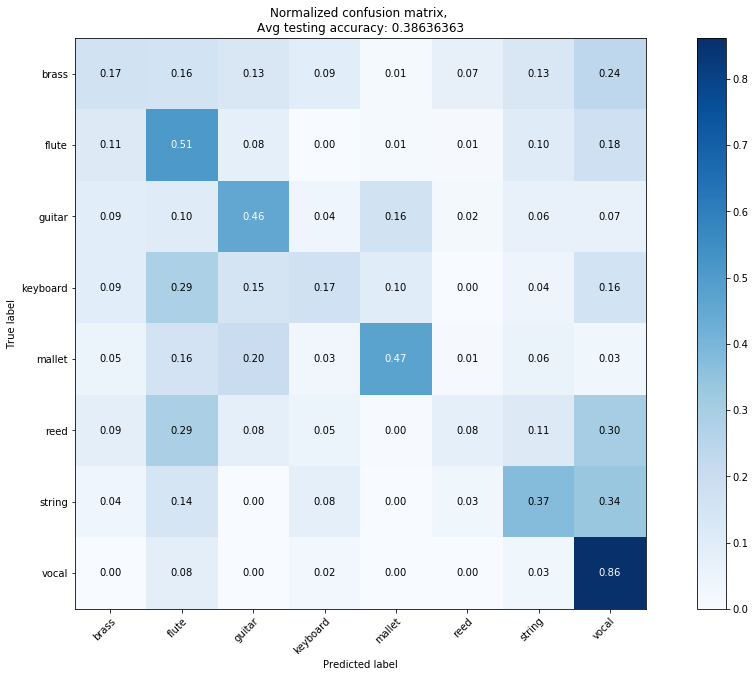

In [17]:
# @param data to train model with @return accuracy as decimal 
def multi_class_model_wobrightanddark(acoustic_data, y): 
    x = (acoustic_data.drop(['instrument_family', 'bright', 'dark'], axis=1)).to_numpy() 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    print(x_train.shape)
    model = models.Sequential()
    model.add(layers.Dense(11, activation='relu', input_dim=10)) 
    model.add(layers.Dense(12, activation='relu')) 
    model.add(layers.Dense(8, activation='softmax')) 
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) 
    history = model.fit(x_train, y_train,batch_size=12, epochs=30, verbose=0) 
    results = model.evaluate(x_test, y_test, batch_size=512, verbose=0)  
    print("Accuracy: ", results[1]) 
    return results[1], model, x_test, y_test
result, model, x_test, y_test = multi_class_model_wobrightanddark(acoustic_data_1, yy)
predictions = model.predict_classes(x_test)
actuals = list(np.argmax(x) for x in y_test)
ax = plot_confusion_matrix(actuals, predictions, result, classes, normalize =True)
plt.savefig("reversed.png", bbox_layout = "tight")
plt.savefig("Confusion_temporal_wobrightanddark.png")
plt.show()

Text(0.5, 1.0, 'Effect of features on system')

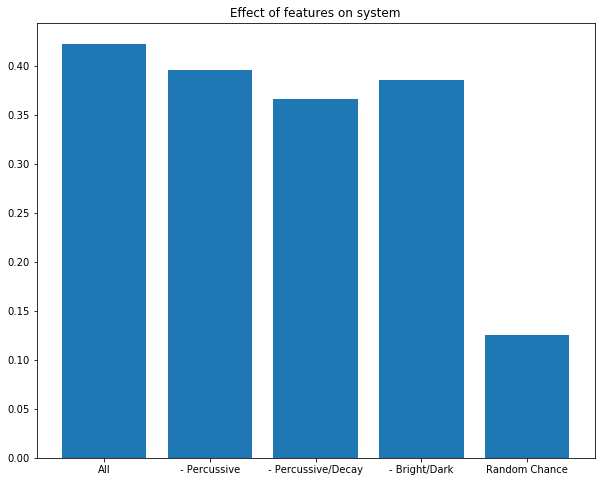

In [22]:
plt.figure(figsize=(10,8))
accuracies = [0.422601,0.3959596,0.36641413,0.3854, 1/8]
cats = ["All", "- Percussive", "- Percussive/Decay","- Bright/Dark", "Random Chance"]
plt.bar(x = cats, height = accuracies)
plt.title("Effect of features on system")